In [1]:
from keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

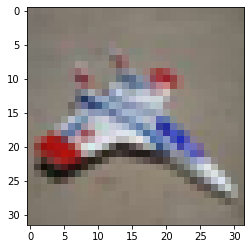

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[30])
plt.show()

In [4]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
x_train=x_train.reshape(-1,32,32,3)
x_test=x_test.reshape(-1,32,32,3)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [8]:
inputs=Input(shape=(32,32,3))

c1=Conv2D(64,(3,3),padding="same",activation="relu")(inputs)
m1=MaxPooling2D(padding="same")(c1)

drop1=Dropout(0.3)(m1)

c2=Conv2D(64,(3,3),padding="same",activation="relu")(drop1)
m2=MaxPooling2D(padding="same")(c2)

drop2=Dropout(0.3)(m2)

c3=Conv2D(64,(5,5),padding="same",activation="relu")(drop2)
m3=MaxPooling2D(padding="same")(c3)


drop2=Dropout(0.3)(m3)

conv_out=Flatten()(drop2)

d1=Dense(512,activation="relu")(conv_out)

out=Dense(10,activation="softmax")(d1)

In [9]:
model=Model(inputs=inputs,outputs=out)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                         

In [11]:
model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
782/782 [==============================] - 143s 181ms/step - loss: 1.5499 - accuracy: 0.4358 - val_loss: 1.2044 - val_accuracy: 0.5758
Epoch 2/20
782/782 [==============================] - 145s 185ms/step - loss: 1.1621 - accuracy: 0.5833 - val_loss: 0.9755 - val_accuracy: 0.6641
Epoch 3/20
782/782 [==============================] - 140s 178ms/step - loss: 1.0077 - accuracy: 0.6401 - val_loss: 0.9540 - val_accuracy: 0.6681
Epoch 4/20
782/782 [==============================] - 140s 178ms/step - loss: 0.9141 - accuracy: 0.6758 - val_loss: 0.8418 - val_accuracy: 0.7054
Epoch 5/20
782/782 [==============================] - 139s 178ms/step - loss: 0.8510 - accuracy: 0.7001 - val_loss: 0.8062 - val_accuracy: 0.7135
Epoch 6/20
782/782 [==============================] - 118s 151ms/step - loss: 0.7986 - accuracy: 0.7172 - val_loss: 0.7481 - val_accuracy: 0.7421
Epoch 7/20
782/782 [==============================] - 133s 170ms/step - loss: 0.7459 - accuracy: 0.7356 - val_loss: 0.7117 -

In [12]:
model.evaluate(x_train,y_train),model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.6811 - accuracy: 0.7694


([0.2497001588344574, 0.925599992275238],
 [0.6811028718948364, 0.7694000005722046])